# Simon Mokhanda (Modelling Options on Futures)

### 1) Defining Functions

In [25]:
import math
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def myNormCDF(x):
    return 0.5*(math.erfc(-x/np.sqrt(2)))
#myNormCDF(1)

In [27]:
def myNormInv(p):
    return -1*np.sqrt(2)*special.erfcinv(2*p)
#myNormInv(0.5)

In [28]:
def myNormPDF(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-1*(x**x)/2)
#myNormPDF(3)

In [29]:
def myPDF(x,av,sg):
    return (1/np.sqrt(2*np.pi*sg*sg))**np.exp(-((x-av)**2)/(2*sg*sg))
#myPDF(2,4,2)

### 2) Importing Futures Data

In [30]:
import pandas as pd
Dataframe = pd.read_excel('S&P500Futures_B.xlsx')
Dataframe.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2055.00,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2045.75,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2019.00,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1996.50,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.50,2058.50,2020.25,2055.00,2055.00,1555733
...,...,...,...,...,...,...,...
1619,2021-06-25,4262.00,4276.75,4253.50,4271.25,4271.25,906160
1620,2021-06-28,4275.00,4282.00,4264.25,4280.50,4280.50,823723
1621,2021-06-29,4280.50,4291.00,4271.75,4282.00,4282.00,741471
1622,2021-06-30,4284.75,4294.25,4269.25,4288.50,4288.50,1100062


In [31]:
Dataframe.rename(columns = {'Adj Close':'AdjustedClose'}, inplace = True)
Dataframe.head()

,Date,Open,High,Low,Close,AdjustedClose,Volume
0,2015-01-02,2055.00,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2045.75,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2019.00,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1996.50,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.50,2058.50,2020.25,2055.00,2055.00,1555733


In [180]:
FuturesPrice = Dataframe.AdjustedClose 
FuturesPrice.head()

0    2046.25
1    2016.00
2    1994.50
3    2019.50
4    2055.00
Name: AdjustedClose, dtype: float64

In [181]:
FuturesPrice2 = Dataframe.AdjustedClose + 255.00
FuturesPrice2.head()

0    2301.25
1    2271.00
2    2249.50
3    2274.50
4    2310.00
Name: AdjustedClose, dtype: float64

In [182]:
import numpy as np
F=np.array(FuturesPrice)
F

array([2046.25, 2016.  , 1994.5 , ..., 4288.5 , 4310.75, 4342.75])

In [183]:
FN=np.array(FuturesPrice2)
FN

array([2301.25, 2271.  , 2249.5 , ..., 4543.5 , 4565.75, 4597.75])

### 3) Pricing of S\&P500 Call on Original Futures

In [184]:
def BlackCall(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(F*myNormCDF1-K*myNormCDF2)

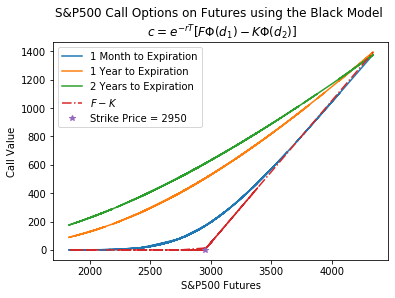

In [204]:
r=0.147; vol=0.5; K=2950;
F
Expiration=[1/12,1,2]
c=np.zeros((3,len(F)))
for i in range(3):
    T=Expiration[i]
    c[i,:]=BlackCall(K,F,T,vol,r)
FK=np.maximum(0,(F-K))
plt.title('S&P500 Call Options on Futures using the Black Model \n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(F,c[0],F,c[1],F,c[2],F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Month to Expiration','1 Year to Expiration',
'2 Years to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call1.jpg",bbox_inches='tight')
plt.show()


### 4) Pricing S\&P500 Call on Predicted Futures

In [ ]:
def BlackCall_New(K,FN,T,vol,r):
    d1 = (np.log(FN/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(FN*myNormCDF1-K*myNormCDF2)

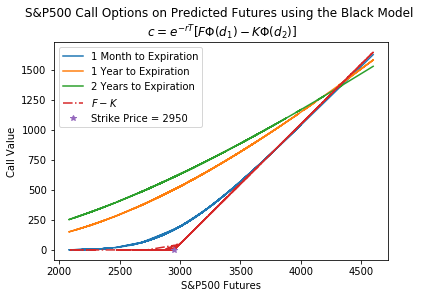

In [205]:
r=0.147; vol=0.5; K=2950;
FN
Expiration=[1/12,1,2]
c=np.zeros((3,len(FN)))
for i in range(3):
    T=Expiration[i]
    c[i,:]=BlackCall_New(K,FN,T,vol,r)
FNK=np.maximum(0,(FN-K))
plt.title('S&P500 Call Options on Predicted Futures using the Black Model \n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(FN,c[0],FN,c[1],FN,c[2],FN,FNK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Month to Expiration','1 Year to Expiration',
'2 Years to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call2.jpg",bbox_inches='tight')
plt.show()

### 5) Pricing of S\&P500 Put Options

In [136]:
def BlackPut(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(K*myNormCDF1*(-d2)-F*myNormCDF1*(-d1))


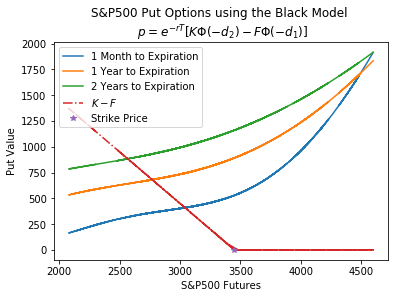

In [144]:
r=0.147; vol=0.5; K=3450;
F
Expiration=[4/12,1,2]
c=np.zeros((3,len(F)))
for i in range(3):
    T=Expiration[i]
    c[i,:]=BlackPut(K,F,T,vol,r)
FK=np.maximum(0,(K-F))
plt.title('S&P500 Put Options using the Black Model \n $p=e^{-rT}[K\Phi(-d_2)-F\Phi(-d_1)]$')
plt.plot(F,c[0],F,c[1],F,c[2],F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Put Value')
plt.legend (['1 Month to Expiration','1 Year to Expiration',
'2 Years to Expiration',
'$K-F$','Strike Price','NorthWest'])
plt.savefig("App2.jpg")
plt.show()

### 6) Delta Greek Dependence

In [15]:
def BlackDelta(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    return np.exp(-r*T)*myNormCDF1

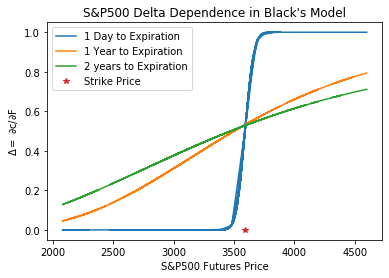

In [179]:
r=0.05; vol=0.3; K=3592;
F
Expiration=[1/12,1,2]
DeltavF=np.zeros((3,len(F)))
for i in range(3):
    T=i+1/365
    DeltavF[i,:]=BlackDelta(K,F,T,vol,r )
plt.plot (F,DeltavF[0],F,DeltavF[1],F,DeltavF[2],K,0,'*')
plt.xlabel('S&P500 Futures Price')
plt.ylabel('$\Delta =$ $\partial$c/$\partial$F')
plt.title('S&P500 Delta Dependence in Black\'s Model')
plt.legend (['1 Day to Expiration','1 Year to Expiration',
'2 years to Expiration','Strike Price','NorthWest'])
plt.savefig("Dep.jpg")
plt.show()


### 7) S&P500 Put-Call Parity Condition


In [17]:
def BlackCall2(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(F*myNormCDF1-K*myNormCDF2)

In [18]:
def BlackPut2(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(-a) for a in d1])
    myNormCDF2=np.array([myNormCDF(-b) for b in d2])
    return np.exp(-r*T)*(K*myNormCDF2-F*myNormCDF1)

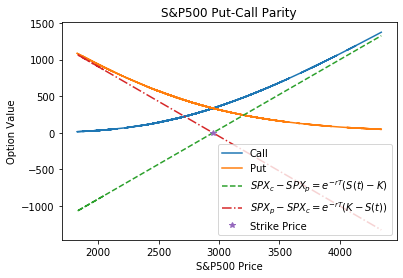

In [19]:
F 
T=1
c=np.zeros((3,len(F)))
p=np.zeros((3,len(F)))

c = BlackCall2(K,F,T,vol,r )
p = BlackPut2(K,F,T,vol,r)

plt.plot(F,c,F,p,F,c-p,'--', F, p-c,'-.', K,0,'*')
plt.xlabel('S&P500 Price'); plt.ylabel('Option Value')
plt.title('S&P500 Put-Call Parity')
plt.legend (['Call','Put','$SPX_c-SPX_p=e^{-rT}(S(t)-K)$','$SPX_p-SPX_c=e^{-rT}(K-S(t))$','Strike Price','North'])
plt.savefig("PC3.jpg",bbox_inches='tight')
plt.show()

### 8) Pricing Call Options for Different Times to Expiration

In [149]:
def BlackCall3(K,F3,T2,vol,r):
    d1 = (np.log(F3/K)+ ((vol**2)/2)*T2)/ (vol*np.sqrt(T2))
    d2 = d1-vol*np.sqrt(T2)
    return np.exp(-r*T2)*(F3*myNormCDF(d1)-K*myNormCDF(d2))

In [155]:
BlackCall3(4483.14,3500,1,1.897,1.3)

585.3077807927456

### 9) Pricing Put Options for Different Times to Expiration

In [22]:
def BlackPut3(K,F4,T3,vol,r):
    d1 = (np.log(F4/K)+ ((vol**2)/2)*T3)/ (vol*np.sqrt(T3))
    d2 = d1-vol*np.sqrt(T3)
    return np.exp(-r*T3)*(K*myNormCDF(-d2)-F4*myNormCDF(-d1))

In [23]:
BlackPut3(3500,4439.75,2,0.7,0.5)

395.77590811876263